In [14]:
import os
import sys
# Get the absolute path to the parent directory of the notebook
notebook_dir = os.path.abspath(r'C:\Users\ende\Desktop\10x\Week-2\Notebooks')
# Get the absolute path to the parent directory of the notebook's parent directory
project_dir = os.path.dirname(notebook_dir)
# Add the project directory to the Python path
sys.path.append(project_dir)

In [15]:
from DB_Connection.connection import PostgresConnection

# You can also import from src folder
from src.utils import missing_values_table, convert_bytes_to_megabytes


In [16]:
import pandas as pd
db = PostgresConnection(dbname='postgres', user='postgres', password='123')
db.connect()

# Example query
query = "SELECT * FROM xdr_data"
result = db.execute_query(query)

# Convert the result to a Pandas DataFrame
df = pd.DataFrame(result, columns=[desc[0] for desc in db.cursor.description])
print(df.head())  # Display the first few rows of the DataFrame

# Close the connection when done
db.close_connection()


Connected to PostgreSQL database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...         

In [17]:
missing_values_df = missing_values_table(df)
print("Missing Values in df:")
print(missing_values_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.
Missing Values in df:
                                          Missing Values  % of Total Values  \
Nb of sec with 37500B < Vol UL                    130254               86.8   
Nb of sec with 6250B < Vol UL < 37500B            111843               74.6   
Nb of sec with 125000B < Vol DL                    97538               65.0   
TCP UL Retrans. Vol (Bytes)                        96649               64.4   
Nb of sec with 31250B < Vol DL < 125000B           93586               62.4   
Nb of sec with 1250B < Vol UL < 6250B              92894               61.9   
Nb of sec with 6250B < Vol DL < 31250B             88317               58.9   
TCP DL Retrans. Vol (Bytes)                        88146               58.8   
HTTP UL (Bytes)                                    81810               54.5   
HTTP DL (Bytes)                                    81474               54.3   
Avg RTT DL (ms)       

In [18]:
df['x'] = convert_bytes_to_megabytes(df, 'HTTP DL (Bytes)')

print(df)

           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.08

In [26]:
df.head(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),x
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,NaN
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,NaN
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,NaN
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,NaN
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,NaN
5,1.311448e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,...,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0,NaN
6,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0,NaN
7,1.304243e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,...,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0,0.230583
8,1.311448e+19,4/14/2019 12:48,121.0,4/25/2019 10:22,960.0,941634.0,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,...,10860867.0,10587264.0,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0,NaN
9,1.304243e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0,0.132246


In [19]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [20]:
print(df.dtypes)


Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [21]:
from src.clean import clean_data

In [22]:
df=clean_data(df)

C:\Users\ende\Desktop\10x\Week-2\src\clean.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_datetime(df[column], errors='coerce')


Your selected dataframe has 56 columns.
There are 30 columns that have missing values.


C:\Users\ende\Desktop\10x\Week-2\src\clean.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [23]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [24]:
df_clean=df

## Task 1 - User Overview analysis 

For the actual telecom dataset, you‘re expected to conduct a full User Overview analysis & the following sub-tasks are your guidance: 
- Start by identifying the top 10 handsets used by the customers.
- Then, identify the top 3 handset manufacturers
- Next, identify the top 5 handsets per top 3 handset manufacturer
- Make a short interpretation and recommendation to marketing teams


In telecommunication, **CDR** or **Call Detail Record** is the voice channel and **XDR** is the **data channel** equivalent. So here, consider xDR as data sessions Detail Record. In xDR, user behavior can be tracked through the following applications:  Social Media, Google, Email, YouTube, Netflix, Gaming, and others. 


In [26]:
# top 10 handsets used by customers
top_10_handsets = df_clean['Handset Type'].value_counts().head(10)

print(top_10_handsets)

Handset Type
Huawei B528S-23A                20323
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [ ]:
!pip install matplotlib

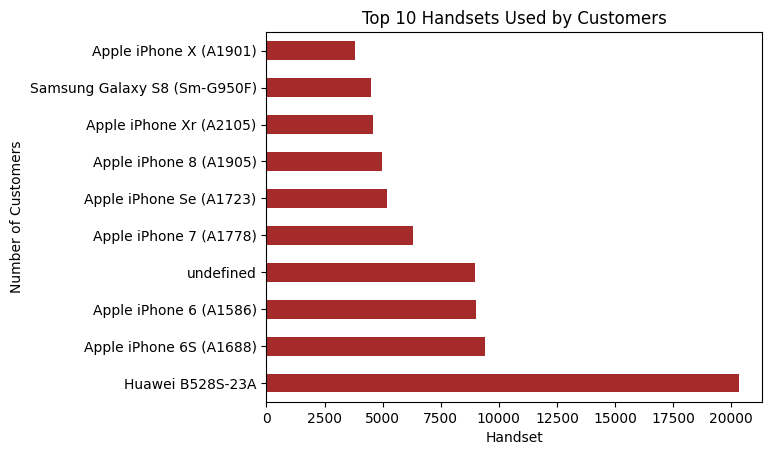

In [35]:
# Import matplotlib
import matplotlib.pyplot as plt

# Create a bar plot

top_10_handsets.plot(kind='barh', color='brown')

# Set the title and labels
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Handset')
plt.ylabel('Number of Customers')

# Show the plot
plt.show()


In [36]:
# top 10 handsets_manufacturers used by customers
top_3_handsets = df_clean['Handset Manufacturer'].value_counts().head(3)

print(top_3_handsets)

Handset Manufacturer
Apple      60136
Samsung    40839
Huawei     34423
Name: count, dtype: int64


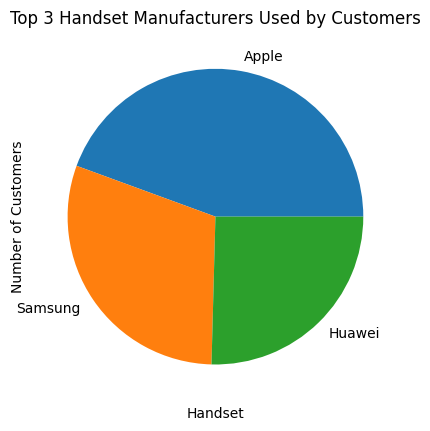

In [37]:
# Import matplotlib
import matplotlib.pyplot as plt

# Create a bar plot

top_3_handsets.plot(kind='pie')

# Set the title and labels
plt.title('Top 3 Handset Manufacturers Used by Customers')
plt.xlabel('Handset')
plt.ylabel('Number of Customers')

# Show the plot
plt.show()


In [44]:
# top 5 handset per top3 manufactures
# Get the top 3 manufacturers
top_3_manufacturers = df_clean['Handset Manufacturer'].value_counts().head(3).index

# For each of the top 3 manufacturers, get the top 5 handsets
for manufacturer in top_3_manufacturers:
    print(f"Top 5 handsets for {manufacturer}:")
    top_5_handsets = df_clean[df_clean['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(top_5_handsets)


Top 5 handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64
Top 5 handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64
Top 5 handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


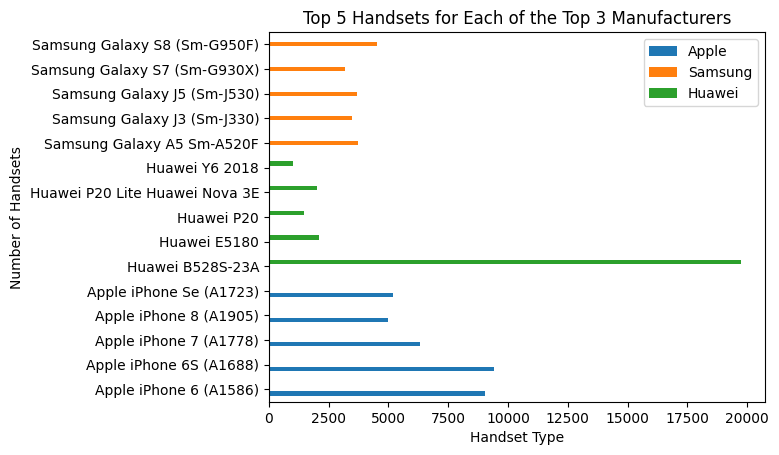

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Get the top 5 handsets for each of the top 3 manufacturers
top_handsets = {}
for manufacturer in top_3_manufacturers:
    top_5_handsets = df_clean[df_clean['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    top_handsets[manufacturer] = top_5_handsets

# Convert the dictionary to a DataFrame
top_handsets_df = pd.DataFrame(top_handsets)

# Create a grouped bar chart
top_handsets_df.plot(kind='barh')

# Set the title and labels
plt.title('Top 5 Handsets for Each of the Top 3 Manufacturers')
plt.xlabel('Handset Type')
plt.ylabel('Number of Handsets')

# Show the plot
plt.show()


### Task1.1
Aggregate per user the following information in the column  
- number of xDR sessions
- Session duration
- the total download (DL) and upload (UL) data
- the total data volume (in Bytes) during this session for each application


In [49]:
# Aggregate per user the number of xDR sessions
user_sessions = df_clean.groupby('MSISDN/Number')['Bearer Id'].nunique()

# Aggregate per user the session duration
user_session_duration = df_clean.groupby('MSISDN/Number')['Dur. (ms)'].sum()

# Aggregate per user the total download (DL) and upload (UL) data
user_total_DL = df_clean.groupby('MSISDN/Number')['Total DL (Bytes)'].sum()
user_total_UL = df_clean.groupby('MSISDN/Number')['Total UL (Bytes)'].sum()

# Aggregate per user the total data volume (in Bytes) during this session for each application
user_total_data_vol = df_clean.groupby('MSISDN/Number')[['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']].sum()

# Print the aggregated information
print("Number of xDR sessions per user:\n", user_sessions)
print("\nSession duration per user:\n", user_session_duration)
print("\nTotal download (DL) data per user:\n", user_total_DL)
print("\nTotal upload (UL) data per user:\n", user_total_UL)
print("\nTotal data volume (in Bytes) during this session for each application per user:\n", user_total_data_vol)


Number of xDR sessions per user:
 MSISDN/Number
3.360100e+10      1
3.360100e+10      1
3.360100e+10      1
3.360101e+10      1
3.360101e+10      2
               ... 
3.379000e+10      1
4.188282e+10    502
3.197021e+12      1
3.370000e+14      1
8.823971e+14      1
Name: Bearer Id, Length: 106857, dtype: int64

Session duration per user:
 MSISDN/Number
3.360100e+10      116720.0
3.360100e+10      181230.0
3.360100e+10      134969.0
3.360101e+10       49878.0
3.360101e+10       37104.0
                   ...    
3.379000e+10      140988.0
4.188282e+10    72446396.0
3.197021e+12      877385.0
3.370000e+14      253030.0
8.823971e+14      869844.0
Name: Dur. (ms), Length: 106857, dtype: float64

Total download (DL) data per user:
 MSISDN/Number
3.360100e+10    8.426375e+08
3.360100e+10    1.207552e+08
3.360100e+10    5.566597e+08
3.360101e+10    4.019932e+08
3.360101e+10    1.363130e+09
                    ...     
3.379000e+10    4.445751e+08
4.188282e+10    4.869236e+11
3.197021e+12   

In [47]:
df_clean.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',


### Task 1.2
Conduct an exploratory data analysis on those data & communicate useful insights. 
- Ensure that you identify and treat all missing values and outliers in the dataset by replacing them with the mean of the corresponding column.
- You’re expected to report about the following using Python script and slide  :
- Describe all relevant variables and associated data types (slide). 
- Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.
- Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation. 
- Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpret your findings.
### Bivariate Analysis 
– explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings. 
Variable transformations 
– segment the users into the top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 
### Correlation Analysis 
– compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, YouTube data, Netflix data, Gaming data, and Other data 
### Dimensionality Reduction 
– perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points maximum). 


In [53]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 640.0 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.9 kB 326.8 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 726.2 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 708.1 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/294.9 kB 885.4 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 842.9 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 842.9 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 842.9 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 569.3 kB/s eta 0:00:00


In [50]:
df_clean.describe()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500000e+05,150000,150000.000000,150000,150000.000000,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,150000.000000,...,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,2019-04-26 12:36:09.616800256,499.188200,2019-04-27 17:39:38.703200256,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
min,6.917538e+18,2019-04-04 12:01:00,0.000000,2019-04-24 22:59:00,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,2019-04-25 00:26:00,250.000000,2019-04-26 07:30:00,251.000000,5.744050e+04,2.082014e+14,3.365151e+10,3.546261e+13,35.000000,...,5.833482e+06,5.517962e+06,5.777095e+06,5.475977e+06,2.104706e+08,4.128424e+06,2.101824e+08,4.145904e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,2019-04-26 08:51:00,499.000000,2019-04-27 23:02:00,500.000000,8.639900e+04,2.082015e+14,3.366380e+10,3.572241e+13,54.000000,...,1.161601e+07,1.101348e+07,1.164222e+07,1.099631e+07,4.234082e+08,8.291215e+06,4.218057e+08,8.267086e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,2019-04-27 18:18:15,749.000000,2019-04-29 07:15:00,750.000000,1.324302e+05,2.082018e+14,3.368473e+10,8.611970e+13,109.795706,...,1.744855e+07,1.651559e+07,1.747050e+07,1.650729e+07,6.331747e+08,1.243163e+07,6.316950e+08,1.238420e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,2019-04-29 07:28:00,999.000000,2019-04-30 23:59:00,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08
std,2.883609e+18,NaN,288.611834,NaN,288.097653,8.103762e+04,2.144730e+10,2.438739e+12,2.237367e+13,559.344484,...,6.710591e+06,6.345445e+06,6.725240e+06,6.359511e+06,2.439683e+08,4.782716e+06,2.432058e+08,4.769020e+06,1.127639e+07,2.441429e+08


In [51]:
df_clean.dtypes

Bearer Id                                float64
Start                             datetime64[ns]
Start ms                                 float64
End                               datetime64[ns]
End ms                                   float64
Dur. (ms)                                float64
IMSI                                     float64
MSISDN/Number                            float64
IMEI                                     float64
Last Location Name                        object
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%)                      float64
10 Kbps < UL TP < 50 Kbps (%)            float64
50 Kbps < UL TP < 30

In [52]:
#  Univariate Analysis
# Import pandas
# List of quantitative columns
quantitative_columns = ['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']

# Perform univariate analysis
for column in quantitative_columns:
    print(f"\nAnalysis for {column}:")
    print(f"Mean: {df[column].mean()}")
    print(f"Median: {df[column].median()}")
    print(f"Mode: {df[column].mode()[0]}")
    print(f"Variance: {df[column].var()}")
    print(f"Standard Deviation: {df[column].std()}")
    print(f"Range: {df[column].max() - df[column].min()}")
    print(f"IQR: {df[column].quantile(0.75) - df[column].quantile(0.25)}")



Analysis for Bearer Id:
Mean: 1.013887465425634e+19
Median: 7.349883264196104e+18
Mode: 1.013887465425634e+19
Variance: 8.315201866017457e+36
Standard Deviation: 2.883609173590876e+18
Range: 6.26900364859067e+18
IQR: 5.692542731480715e+18

Analysis for Start ms:
Mean: 499.1882
Median: 499.0
Mode: 341.0
Variance: 83296.79086603242
Standard Deviation: 288.6118342445999
Range: 999.0
IQR: 499.0

Analysis for End ms:
Mean: 498.80088
Median: 500.0
Mode: 872.0
Variance: 83000.25777961078
Standard Deviation: 288.097653200457
Range: 999.0
IQR: 499.0

Analysis for Dur. (ms):
Mean: 104608.56034666667
Median: 86399.0
Mode: 86399.0
Variance: 6567096094.97398
Standard Deviation: 81037.62147900184
Range: 1852194.0
IQR: 74989.75

Analysis for IMSI:
Mean: 208201639651669.0
Median: 208201546359071.0
Mode: 208201639651669.03
Variance: 4.599865100011188e+20
Standard Deviation: 21447296100.001015
Range: 10027194860177.0
IQR: 370342619.75

Analysis for MSISDN/Number:
Mean: 41882819545.02737
Median: 3366379

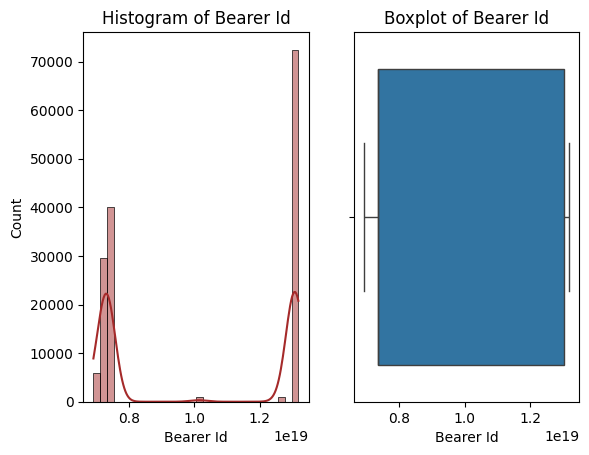

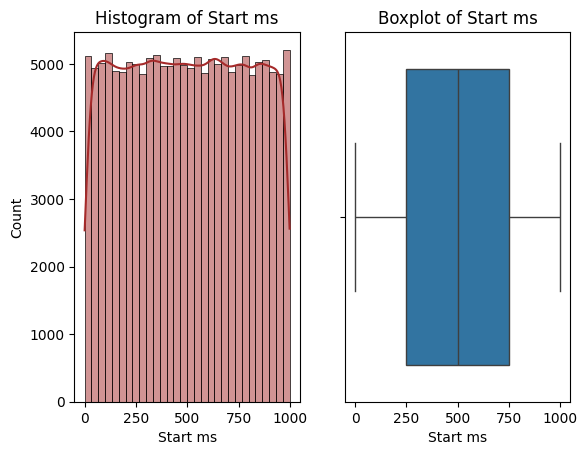

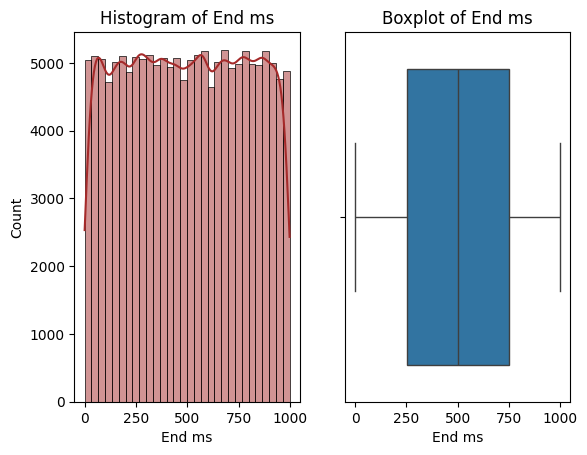

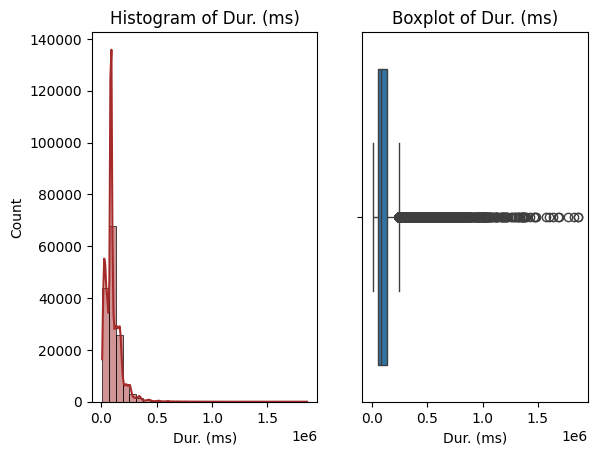

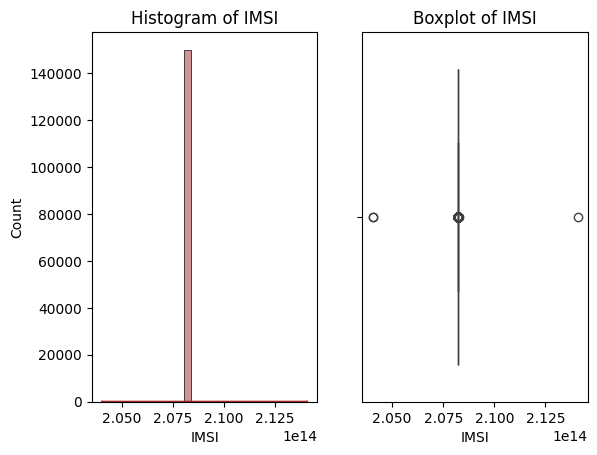

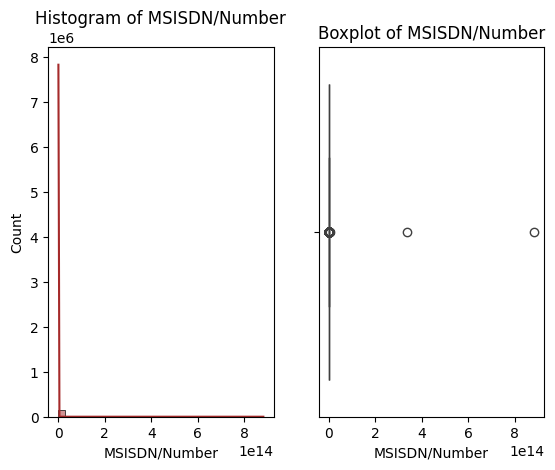

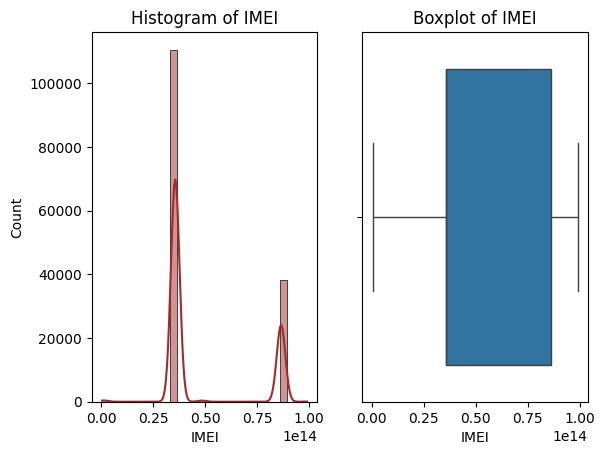

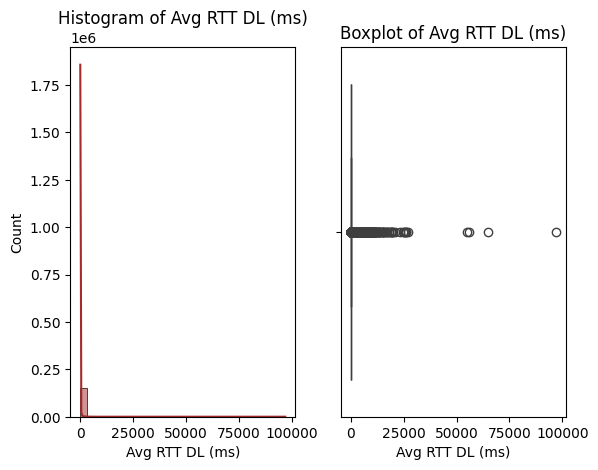

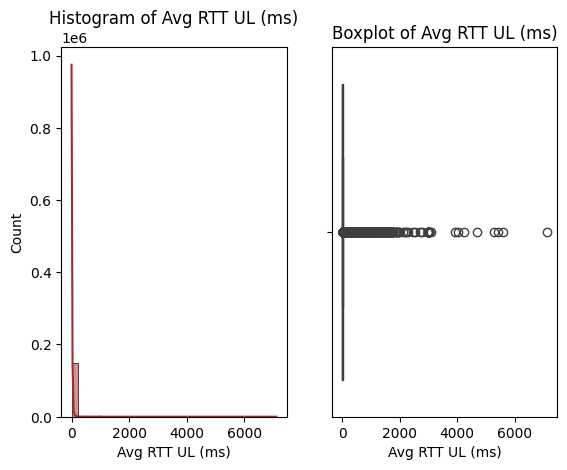

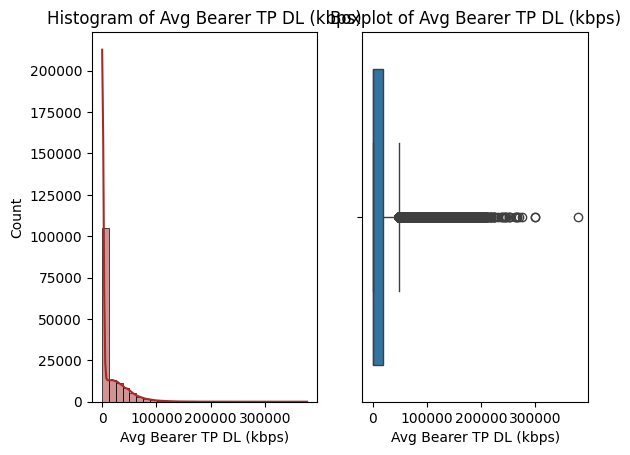

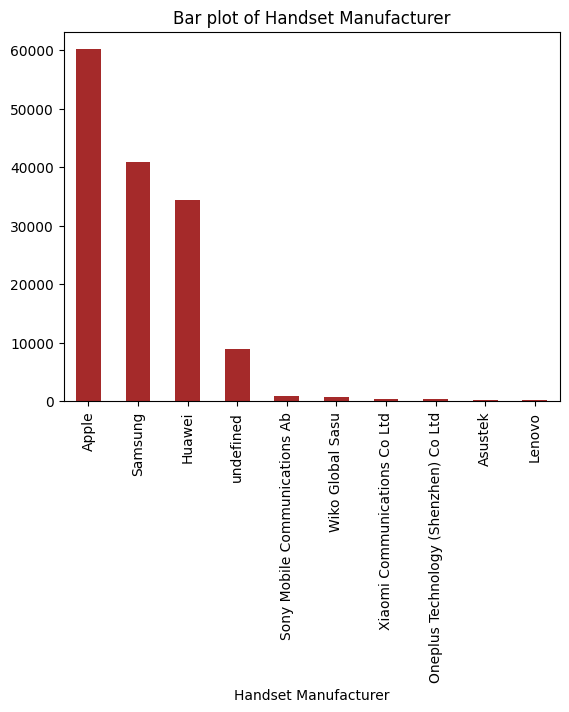

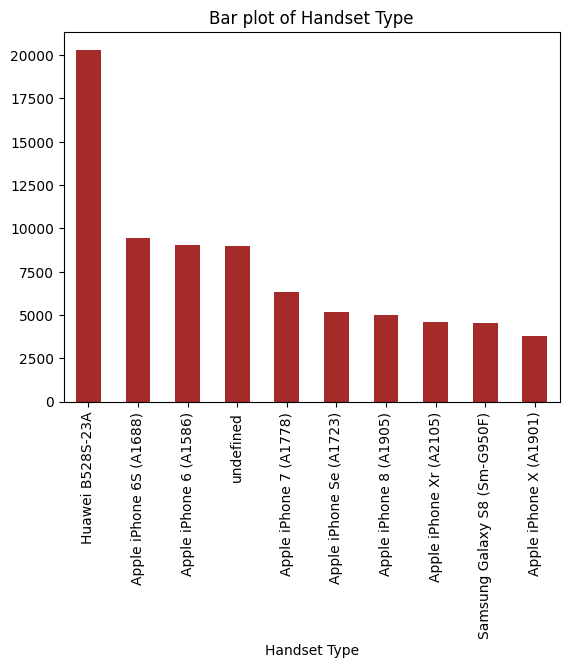

In [56]:
import seaborn as sns

# List of numerical columns


# List of categorical columns
categorical_columns = ['Handset Manufacturer', 'Handset Type']

# For each numerical column, create a histogram and a boxplot
for column in quantitative_columns[:10]:
   

    plt.subplot(1, 2, 1)
    sns.histplot(df_clean[column], bins=30, kde=True, color='brown')
    plt.title(f'Histogram of {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_clean[column])
    plt.title(f'Boxplot of {column}')

    plt.show()

# For each categorical column, create a bar plot
for column in categorical_columns[:10]:
    
    df[column].value_counts().head(10).plot(kind='bar',color='brown')
    plt.title(f'Bar plot of {column}')
    plt.show()


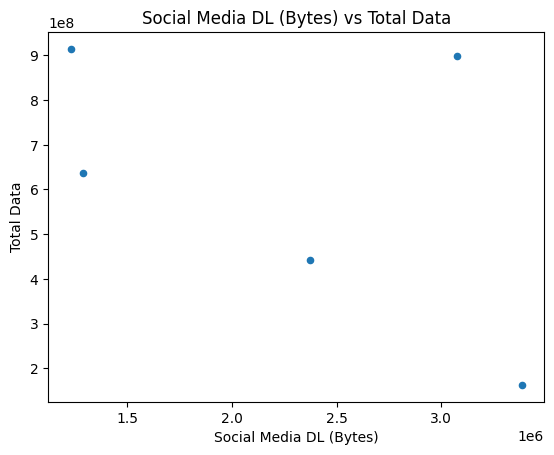

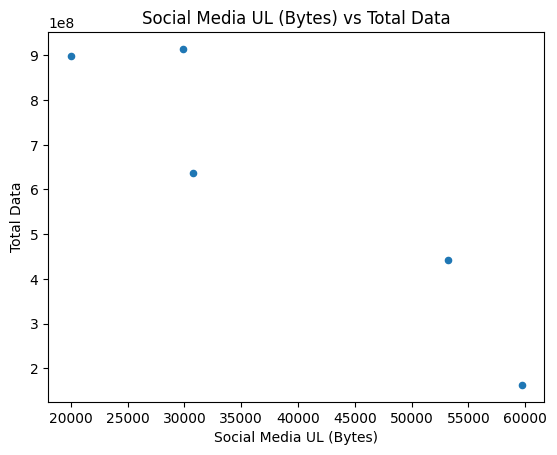

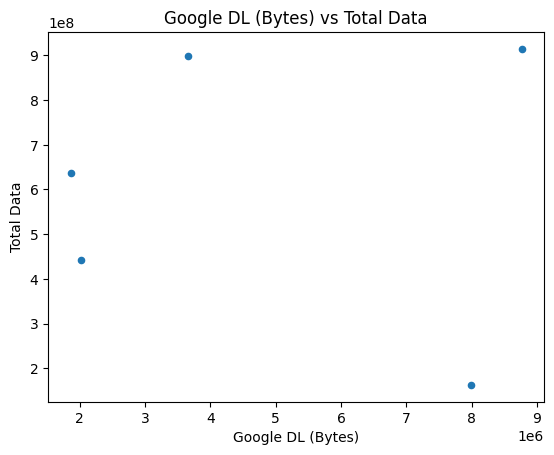

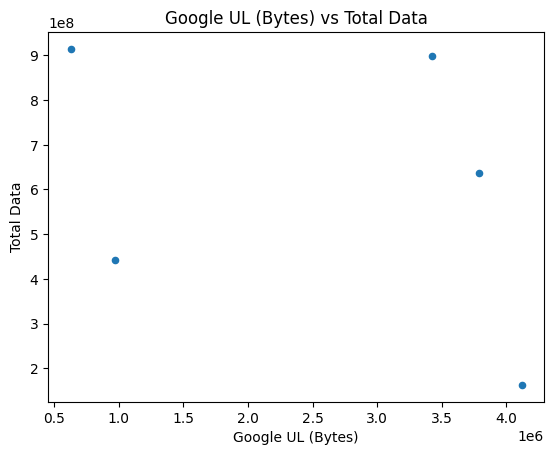

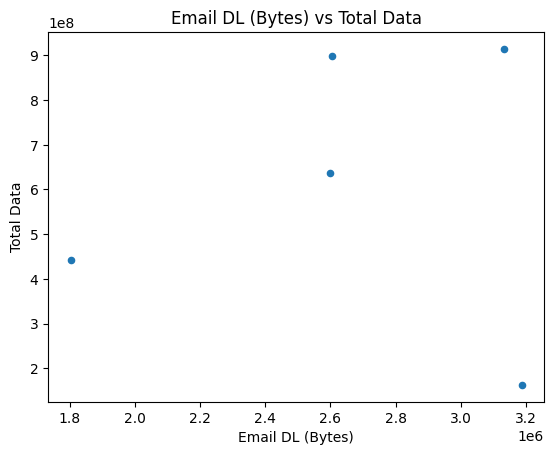

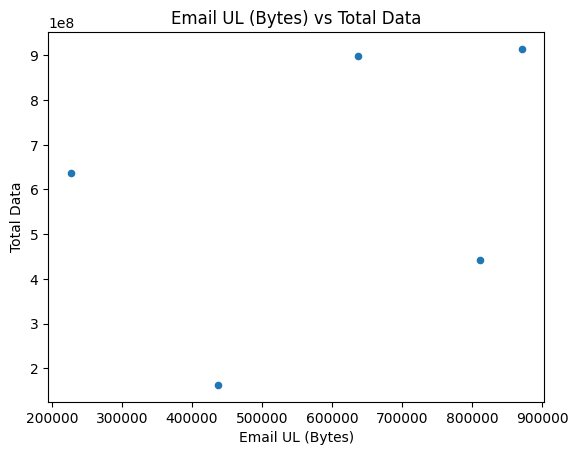

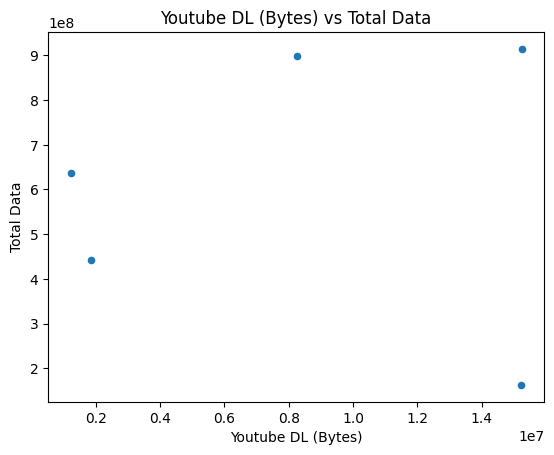

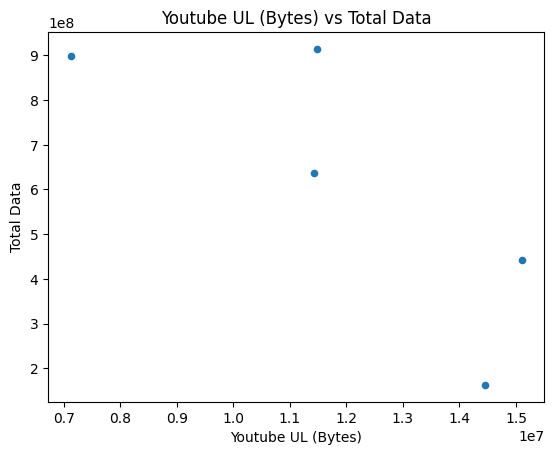

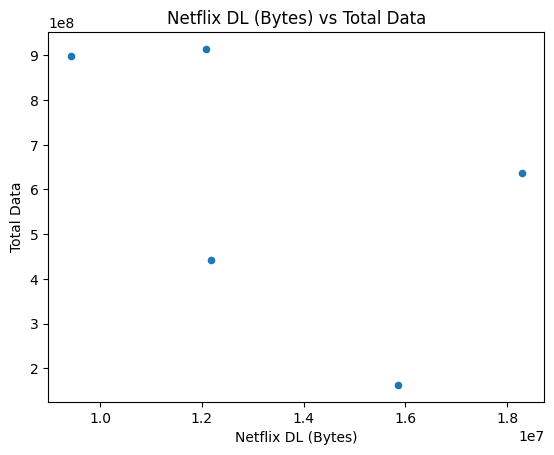

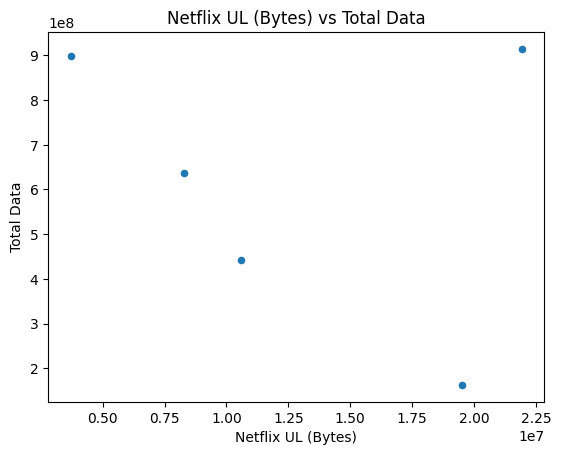

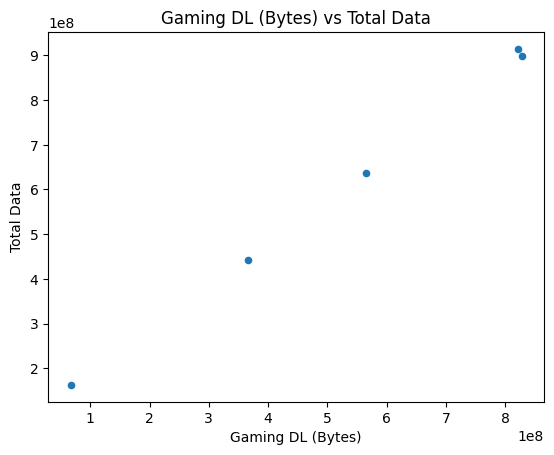

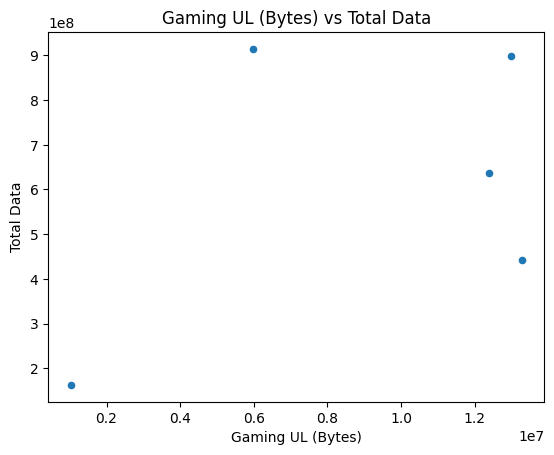

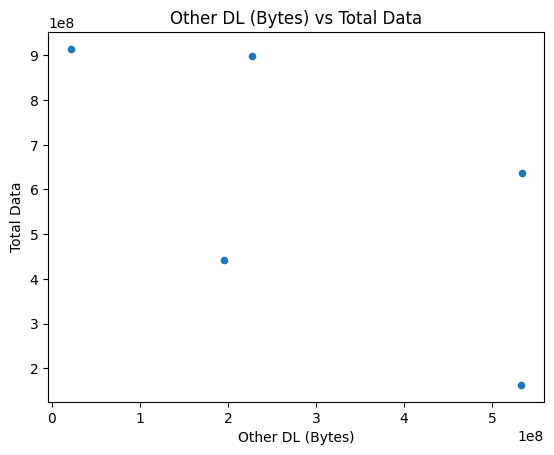

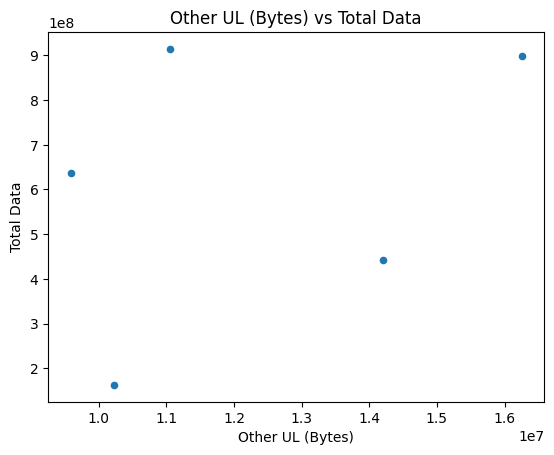

Decile Rank
5    7.438004e+12
6    7.416929e+12
7    7.458742e+12
8    7.459600e+12
Name: Total Data, dtype: float64


In [61]:
# Import necessary libraries

#Bivariate 
# Calculate total DL+UL data
df_clean['Total Data'] = df_clean['Total DL (Bytes)'] + df_clean['Total UL (Bytes)']

# List of applications
applications = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']

# For each application, create a scatter plot with the total data
for app in applications:
    df_clean[30:35].plot(kind='scatter', x=app, y='Total Data')
    plt.title(f'{app} vs Total Data')
    plt.show()
# Create decile classes based on the total duration

df_clean['Decile Rank'] = pd.qcut(df_clean['Dur. (ms)'], 10, labels=False, duplicates='drop')


# Get the top five decile classes
top_five_deciles = df_clean[df_clean['Decile Rank'] >= 5]

# Compute the total data (DL+UL) per decile class
total_data_per_decile = top_five_deciles.groupby('Decile Rank')['Total Data'].sum()

print(total_data_per_decile)


In [66]:
# List of variables
variables = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']

# Compute the correlation matrix
corr_matrix = df_clean[variables].corr()

print(corr_matrix)


                         Social Media DL (Bytes)  Social Media UL (Bytes)  \
Social Media DL (Bytes)                 1.000000                -0.000555   
Social Media UL (Bytes)                -0.000555                 1.000000   
Google DL (Bytes)                      -0.001954                 0.003542   
Google UL (Bytes)                       0.000186                 0.001085   
Email DL (Bytes)                        0.004745                 0.004823   
Email UL (Bytes)                       -0.002518                -0.001427   
Youtube DL (Bytes)                     -0.001389                -0.001786   
Youtube UL (Bytes)                      0.002345                -0.002368   
Netflix DL (Bytes)                     -0.001817                -0.000772   
Netflix UL (Bytes)                      0.003457                -0.002493   
Gaming DL (Bytes)                       0.001018                 0.000210   
Gaming UL (Bytes)                       0.003095                 0.000844   

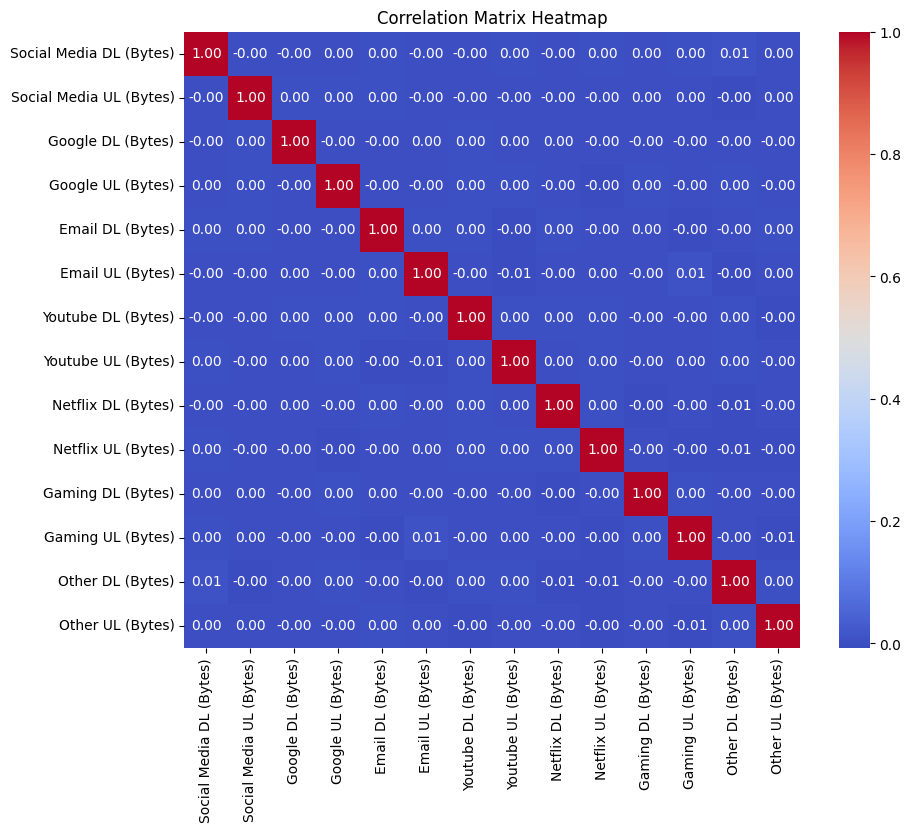

In [67]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix (assuming 'df' is your DataFrame)
corr_matrix = df_clean[variables].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Set the title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()


In [69]:
pip install scikit-learn

  Using cached scikit_learn-1.4.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.4.2-cp312-cp312-win_amd64.whl (10.6 MB)
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/301.8 kB 2.0 MB/s eta 0:00:01
   -------------- ------------------------- 112.6/301.8 kB 1.1 MB/s eta 0:00:01
   ------------------ ------------------- 143.4/301.8 kB 950.9 kB/s eta 0:00:01
   ------------------------------------ --- 276.5/301.8 kB 1.0 MB/s eta 0:00:01
   -------------------------------------  297.0/301.8 kB 965.4 kB/s eta 0:00:01
   -------------------------------------  297.0/301.8 kB 965.4 kB/s eta 0:00:01
   -------------------------------------  297.0/301.8 kB 965.4 kB/s eta 0:00:01
   -------------------------------------  297.0/301.8 kB 965.4 kB/s eta 0:00:01
   -------------------------------------  297.0/301.8 kB 965.4 kB/s eta 0:00

In [71]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame

# Select only the numeric columns
numeric_columns = df_clean.select_dtypes(include=[np.number])

# Standardize the features to have mean=0 and variance=1
features_scaled = StandardScaler().fit_transform(numeric_columns)

# Apply PCA
pca = PCA()
principalComponents = pca.fit_transform(features_scaled)

# Convert array of principal components to a DataFrame
principal_cleadf_clean = pd.DataFrame(data = principalComponents, columns = ['Principal Component ' + str(i) for i in range(1, len(numeric_columns.columns)+1)])


In [72]:
principal_cleadf_clean

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,...,Principal Component 33,Principal Component 34,Principal Component 35,Principal Component 36,Principal Component 37,Principal Component 38,Principal Component 39,Principal Component 40,Principal Component 41,Principal Component 42
0,-6.403876,1.057445,23.490859,-0.536054,2.245004,-9.365161,-0.945609,-0.949372,-0.185038,-0.075550,...,-2.521970,14.134021,-0.217667,-0.107531,0.124026,-0.033465,3.458847e-07,-5.221765e-15,2.866867e-16,-8.870978e-15
1,-5.063710,-1.483839,17.421664,1.547652,1.659499,-6.806107,-0.743490,0.409333,-0.247777,1.590394,...,-1.787124,10.010509,-0.162951,-0.075360,0.089174,-0.023762,3.848840e-06,-3.162691e-15,-3.947165e-15,-5.470411e-15
2,-5.077282,1.330682,17.372459,-1.622861,1.630165,-6.805466,-0.611877,0.974595,-0.122793,0.584238,...,-1.785342,9.974249,-0.157264,-0.073800,0.090219,-0.024313,1.359327e-06,-2.506264e-15,-4.743803e-15,-6.456303e-15
3,-4.995263,-2.783159,16.841400,0.156390,1.593830,-6.584089,-0.617794,0.847478,0.093454,1.566645,...,-1.722001,9.621973,-0.150925,-0.086543,0.084601,-0.022426,9.471661e-07,-3.368942e-14,-1.948541e-14,6.307505e-15
4,-4.320029,-0.779392,13.757518,-0.363844,1.306207,-5.323662,-0.530957,-1.265430,-0.017520,1.713618,...,-1.337410,7.524483,-0.120593,-0.054026,0.067929,-0.017754,3.020686e-06,-3.155682e-15,-1.982191e-15,6.450582e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,4.076884,-2.674163,-1.527763,1.473350,-0.283101,-3.418918,-0.103130,-0.055773,0.301784,-0.999052,...,-0.698973,-0.308581,0.193140,0.041739,0.084176,-0.013309,-2.000044e-06,4.598550e-16,-3.517040e-16,3.032642e-16
149996,-1.345937,-0.954582,-0.749527,2.056188,0.079105,0.446690,0.036311,0.756058,-1.002319,-0.738216,...,-0.011944,0.152673,-0.026985,-0.010530,0.036003,-0.009986,-2.252191e-06,3.586048e-16,3.969108e-18,4.816071e-17
149997,-1.502826,-1.488777,-0.116422,-0.273272,0.099210,0.232407,-0.021598,0.823750,-0.830950,0.287319,...,0.065792,-0.364520,-0.010204,0.004819,0.017298,-0.004744,-1.850084e-06,1.849814e-16,3.210823e-16,5.295952e-16
149998,-1.417689,-0.938060,-0.011743,-0.827999,0.019435,0.247198,0.015161,-0.270495,0.747635,-0.694570,...,0.067377,-0.370373,-0.002227,-0.010282,0.018443,-0.004254,-3.217667e-07,-9.303376e-17,1.412145e-16,-3.660144e-16


## Task 2 - User Engagement analysis
As telecom brands are the data providers of all online activities, meeting user requirements, and creating an engaging user experience is a prerequisite for them. Building & improving the QoS (Quality of Service) to leverage the mobile platforms and to get more users for the business is good but the success of the business would be determined by the user engagement and activity of the customers on available apps. 


In telecommunication, tracking the user activities on the database sessions is a good starting point to appreciate the user engagement for the overall applications and per application as well. If we can determine the level of engagement of a random user for any application, then it could help the technical teams of the business to know where to concentrate network resources for different clusters of customers based on the engagement scores.


In the current dataset you’re expected to track the user’s engagement using the following engagement metrics: 
- sessions frequency 
- the duration of the session 
- the session total traffic (download and upload (bytes))


In [87]:
sessions_frequency = df_clean.groupby('MSISDN/Number')['Bearer Id'].count()
session_duration = df_clean.groupby('MSISDN/Number')['Dur. (ms)'].sum()
session_total_traffic = df_clean.groupby('MSISDN/Number')[['Total UL (Bytes)', 'Total DL (Bytes)']].sum()
session_total_traffic['Total Traffic'] = session_total_traffic['Total UL (Bytes)'] + session_total_traffic['Total DL (Bytes)']


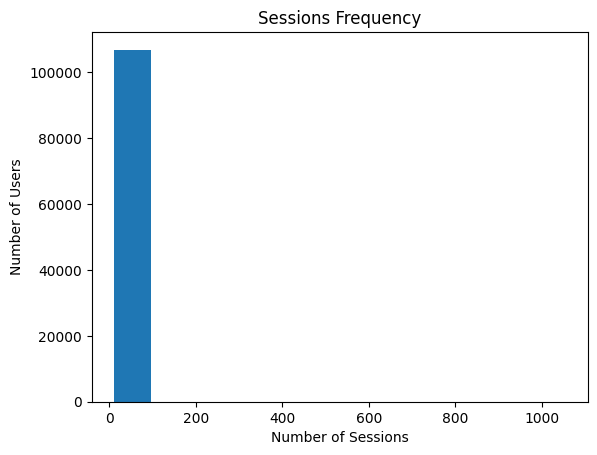

In [88]:
sessions_frequency.plot(kind='hist', rwidth=0.8)
plt.title('Sessions Frequency')
plt.xlabel('Number of Sessions')
plt.ylabel('Number of Users')
plt.show()


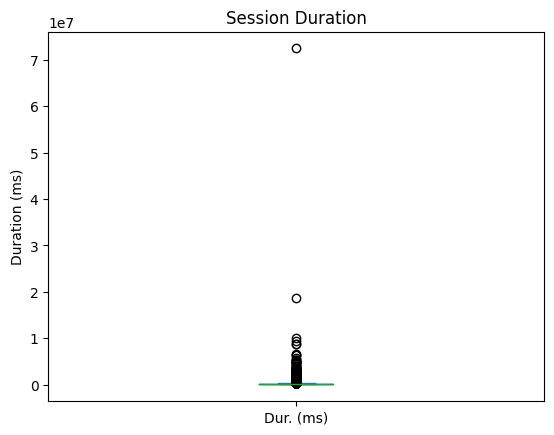

In [89]:
session_duration.plot(kind='box')
plt.title('Session Duration')
plt.ylabel('Duration (ms)')
plt.show()


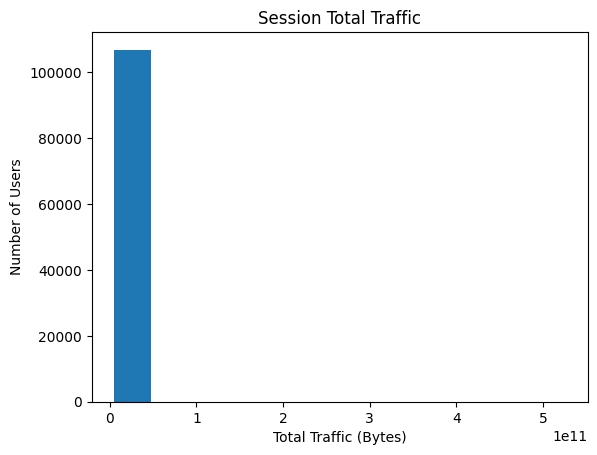

In [90]:
session_total_traffic['Total Traffic'].plot(kind='hist', rwidth=0.8)
plt.title('Session Total Traffic')
plt.xlabel('Total Traffic (Bytes)')
plt.ylabel('Number of Users')
plt.show()


### Task 2.1 - Following the above, perform the following tasks:
Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 
Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 
Compute the minimum, maximum, average & total non-normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.
Aggregate user total traffic per application and derive the top 10 most engaged users per application
Plot the top 3 most used applications using appropriate charts.  
Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
What is the optimized value of k (use elbow method for this)?  
Interpret your findings. 


In [91]:

engagement_metrics = ['Bearer Id', 'Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)']
for metric in engagement_metrics:
    top_10_customers = df_clean.groupby('MSISDN/Number')[metric].sum().nlargest(10)
    print(f"Top 10 customers for {metric}:\n", top_10_customers)


Top 10 customers for Bearer Id:
 MSISDN/Number
4.188282e+10    9.627229e+21
3.362578e+10    2.217933e+20
3.365973e+10    2.088229e+20
3.376054e+10    1.963570e+20
3.367588e+10    1.960687e+20
3.366716e+10    1.695515e+20
3.362708e+10    1.568694e+20
3.376041e+10    1.567973e+20
3.365936e+10    1.435387e+20
3.366907e+10    1.434667e+20
Name: Bearer Id, dtype: float64
Top 10 customers for Dur. (ms):
 MSISDN/Number
4.188282e+10    72446396.0
3.362578e+10    18553754.0
3.361489e+10     9966898.0
3.376054e+10     9279434.0
3.362632e+10     8791927.0
3.366716e+10     8744914.0
3.366284e+10     6614270.0
3.366469e+10     6288730.0
3.360313e+10     6287761.0
3.366746e+10     5649882.0
Name: Dur. (ms), dtype: float64
Top 10 customers for Total UL (Bytes):
 MSISDN/Number
4.188282e+10    4.432530e+10
3.362578e+10    7.295774e+08
3.376054e+10    7.034786e+08
3.361489e+10    6.894830e+08
3.362632e+10    6.696507e+08
3.365973e+10    6.242603e+08
3.367588e+10    5.815688e+08
3.366716e+10    5.663264e

In [95]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_clean[engagement_metrics])

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_normalized)


In [96]:
# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Compute the minimum, maximum, average & total non-normalized metrics for each cluster
cluster_metrics = df_clean.groupby('Cluster')[engagement_metrics].agg(['min', 'max', 'mean', 'sum'])
print(cluster_metrics)


            Bearer Id                                           Dur. (ms)  \
                  min           max          mean           sum       min   
Cluster                                                                     
0        6.917538e+18  1.013887e+19  7.298200e+18  5.534736e+23    7146.0   
1        1.013887e+19  1.318654e+19  1.304426e+19  4.853377e+23    7142.0   
2        1.013887e+19  1.318654e+19  1.304307e+19  4.820199e+23    7189.0   

                                                Total UL (Bytes)              \
               max           mean           sum              min         max   
Cluster                                                                        
0        1573420.0  104797.970582  7.947564e+09        2866892.0  77458132.0   
1        1859327.0  103527.798344  3.851959e+09        4338786.0  76667292.0   
2        1859336.0  105307.976080  3.891762e+09        6900733.0  78331311.0   

                                    Total DL (Bytes)    

In [98]:
# Calculate total data for each application
df_clean['Social Media Data'] = df_clean['Social Media DL (Bytes)'] + df_clean['Social Media UL (Bytes)']
df_clean['Google Data'] = df_clean['Google DL (Bytes)'] + df_clean['Google UL (Bytes)']
df_clean['Email Data'] = df_clean['Email DL (Bytes)'] + df_clean['Email UL (Bytes)']
df_clean['Youtube Data'] = df_clean['Youtube DL (Bytes)'] + df_clean['Youtube UL (Bytes)']
df_clean['Netflix Data'] = df_clean['Netflix DL (Bytes)'] + df_clean['Netflix UL (Bytes)']
df_clean['Gaming Data'] = df_clean['Gaming DL (Bytes)'] + df_clean['Gaming UL (Bytes)']
df_clean['Other Data'] = df_clean['Other DL (Bytes)'] + df_clean['Other UL (Bytes)']

# List of applications
applications = ['Social Media Data', 'Google Data', 'Email Data', 'Youtube Data', 'Netflix Data', 'Gaming Data', 'Other Data']

# For each application, find the top 10 most engaged users
for app in applications:
    top_10_users_app = df_clean.groupby('MSISDN/Number')[app].sum().nlargest(10)
    print(f"Top 10 most engaged users for {app}:\n", top_10_users_app)


Top 10 most engaged users for Social Media Data:
 MSISDN/Number
4.188282e+10    1.971989e+09
3.362632e+10    4.337478e+07
3.376054e+10    3.978319e+07
3.365973e+10    3.541236e+07
3.361489e+10    2.829454e+07
3.362578e+10    2.713550e+07
3.366716e+10    2.424785e+07
3.378632e+10    2.397492e+07
3.366907e+10    2.380083e+07
3.360313e+10    2.307782e+07
Name: Social Media Data, dtype: float64
Top 10 most engaged users for Google Data:
 MSISDN/Number
4.188282e+10    8.240770e+09
3.362632e+10    1.521919e+08
3.362578e+10    1.423079e+08
3.361489e+10    1.279738e+08
3.376054e+10    1.232231e+08
3.365973e+10    1.165163e+08
3.378632e+10    1.102545e+08
3.367588e+10    1.098605e+08
3.366716e+10    1.050327e+08
3.376127e+10    9.708999e+07
Name: Google Data, dtype: float64


Top 10 most engaged users for Email Data:
 MSISDN/Number
4.188282e+10    2.397621e+09
3.362632e+10    4.241878e+07
3.361489e+10    4.078863e+07
3.362578e+10    4.063397e+07
3.378632e+10    3.631012e+07
3.365973e+10    3.599979e+07
3.376054e+10    3.369377e+07
3.367588e+10    3.151442e+07
3.366546e+10    3.041788e+07
3.366716e+10    3.033580e+07
Name: Email Data, dtype: float64
Top 10 most engaged users for Youtube Data:
 MSISDN/Number
4.188282e+10    2.431808e+10
3.362578e+10    4.529588e+08
3.376054e+10    3.962892e+08
3.361489e+10    3.943702e+08
3.362632e+10    3.744830e+08
3.367588e+10    3.174106e+08
3.366716e+10    3.152313e+08
3.362708e+10    3.087908e+08
3.376041e+10    3.031691e+08
3.369879e+10    3.026620e+08
Name: Youtube Data, dtype: float64
Top 10 most engaged users for Netflix Data:
 MSISDN/Number
4.188282e+10    2.423094e+10
3.365973e+10    3.995191e+08
3.361489e+10    3.614010e+08
3.362578e+10    3.569806e+08
3.376054e+10    3.346433e+08
3.362632e+10    3.287257e+08
3.3

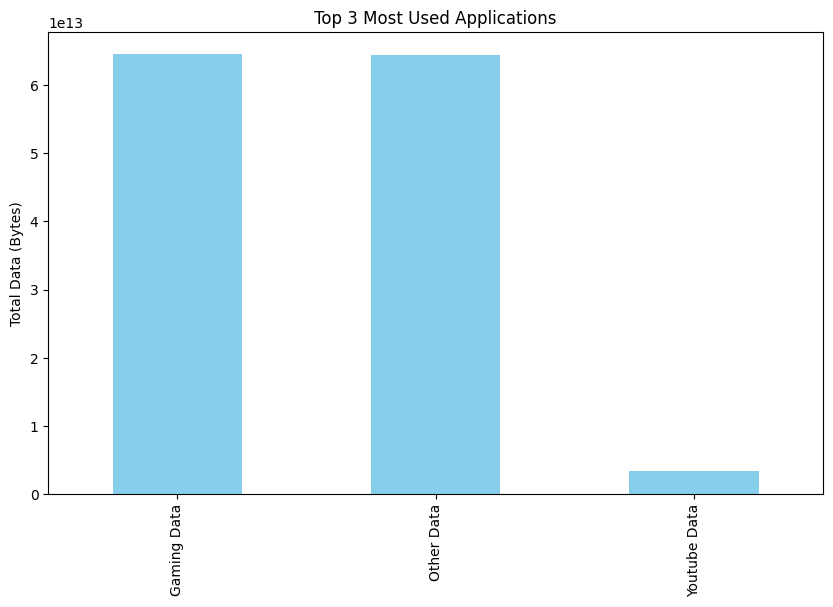

In [102]:
# Calculate total data usage for each application
total_data_usage = df_clean[applications].sum()

# Sort and select top 3 applications
top_3_apps = total_data_usage.sort_values(ascending=False)[:3]

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_3_apps.plot(kind='bar', color='skyblue')
plt.title('Top 3 Most Used Applications')
plt.ylabel('Total Data (Bytes)')
plt.show()


C:\Users\ende\AppData\Local\Temp\ipykernel_9868\1982014706.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, distortions, 'bx-', color='red')


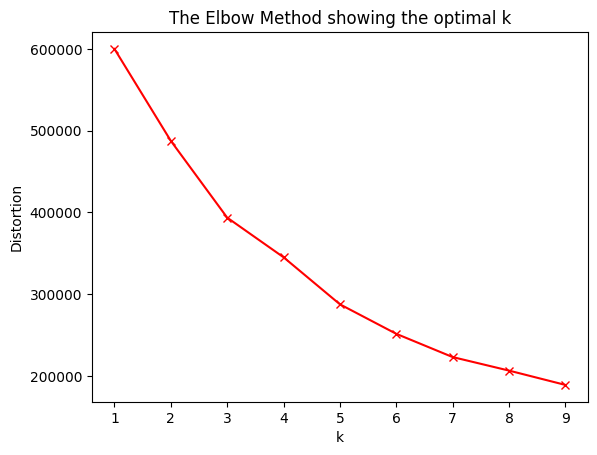

In [101]:
# Determine the optimal number of clusters using the elbow method
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_normalized)
    distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-', color='red')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


## Task 3 - Experience Analytics
The Telecommunication industry has experienced a great revolution in the last decade. Mobile devices have become the new fashion trend and play a vital role in everyone's life. The success of the mobile industry is largely dependent on its consumers. Therefore, it is necessary for the vendors to focus on their target audience i.e. what are the needs and requirements of their consumers and how they feel and perceive their products. Tracking & evaluating customers’ experience can help organizations to optimize their products and services so that it meet the evolving user expectations, needs, and acceptance.


In the telecommunication industry, the user experience is related, most of the time, to network parameter performances or the customers’ device characteristics.  


In this section, you’re expected to focus on network parameters like TCP retransmission, Round Trip Time (RTT), Throughput, and the customers’ device characteristics like the handset type to conduct a deep user experience analysis. The network parameters are all columns in the dataset. The following questions are your guidance to complete the task. For this task, you need a Python script that includes all solutions to tasks.


### Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing with the mean or the mode of the corresponding variable):

Average TCP retransmission
Average RTT
Handset type
Average throughput


### Task 3.2 - Compute & list 10 of the top, bottom, and most frequent:
TCP values in the dataset. 
RTT values in the dataset.
Throughput values in the dataset.



### Task 3.3 - Compute & report:
The distribution of the average throughput per handset type and provide interpretation for your findings.
The average TCP retransmission view per handset type and provide interpretation for your findings.


### Task 3.4 
- Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)

## Task 4 - Satisfaction Analysis
Assuming that the satisfaction of a user is dependent on user engagement and experience, you’re expected in this section to analyze customer satisfaction in depth. The following tasks will guide you: 

Based on the engagement analysis + the experience analysis you conducted above,
### Task 4. 1 - Write a Python program to assign:
engagement score to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) (Euclidean Distance)
experience score for each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience cluster. 


### Task 4.2 
- Consider the average of both engagement & experience scores as  the satisfaction score & report the top 10 satisfied customer 


### Task 4.3
 - Build a regression model of your choice to predict the satisfaction score of a customer. 


### Task 4.4 
- Run a k-means (k=2) on the engagement & the experience score. 


### Task 4.5 
- Aggregate the average satisfaction & experience score per cluster. 


### Task 4.6 
- Export your final table containing all user ID + engagement, experience & satisfaction scores in your local MySQL database. Report a screenshot of a select query output on the exported table. 


### Task 4.7 
- Model deployment tracking- deploy the model and monitor your model. Here you can use Docker or other MlOps tools which can help you to track your model’s change.  Your model tracking report includes code version, start and end time, source, parameters, metrics (loss convergence), and artifacts or any output file regarding each specific run. (CSV file, screenshot)